# Regression Project - Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui)

In [2]:
# This is to enlarge the width of the Juypter notebook for better visual experience
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
# Making the visual more clear and increase the default size of any plot
matplotlib.rcParams['figure.figsize'] = (13,8)
matplotlib.rcParams['lines.linewidth'] = 2

%config InlineBackend.figure_format = 'retina'# for high resolution of the plots

In [3]:
#training_df=pd.read_excel(r'D:\DataScienceProjects\Project_Folder\Regression Project - Flight Price Prediction\input\Training_Data.xlsx')
training_df=pd.read_excel(r'../input/Training_Data.xlsx')

## Exploratory Data Analysis

In [4]:
## Creating a function to do primary data analysis
def primary_analysis(df):
    data_shape = df.shape;
    print("**The dataset has {} rows and {} columns.**".format(data_shape[0],data_shape[1]))
    data_dup=df.duplicated().sum();
    print("\n**The dataset has {} duplicate rows.**".format(data_dup))
    data_missing= df.isna().sum();
    print("\n**The count of missing values in all variables:**\n \n{}.".format(data_missing))
    data_dtypes= df.dtypes;
    print("\n**The information about the dtypes of the variables:**\n \n{}.".format(data_dtypes))
    return primary_analysis

In [5]:
primary_analysis(training_df)

**The dataset has 10683 rows and 11 columns.**

**The dataset has 220 duplicate rows.**

**The count of missing values in all variables:**
 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64.

**The information about the dtypes of the variables:**
 
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object.


<function __main__.primary_analysis(df)>

In [6]:
training_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# As there are only one missing value we can remove it from our dataset
training_df.dropna(inplace=True)

In [8]:
training_df.shape

(10682, 11)

In [9]:
training_df[training_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [10]:
# Dropping the duplicates rows from the dataset
training_df.drop_duplicates(inplace=True)

In [11]:
primary_analysis(training_df);

**The dataset has 10462 rows and 11 columns.**

**The dataset has 0 duplicate rows.**

**The count of missing values in all variables:**
 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64.

**The information about the dtypes of the variables:**
 
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object.


In [12]:
# How many Airlines are there in the dataset
training_df['Airline'].value_counts().sort_values()

Trujet                                  1
Vistara Premium economy                 3
Jet Airways Business                    6
Multiple carriers Premium economy      13
GoAir                                 194
Air Asia                              319
Vistara                               478
SpiceJet                              815
Multiple carriers                    1196
Air India                            1694
IndiGo                               2043
Jet Airways                          3700
Name: Airline, dtype: int64

### Univariate Analysis

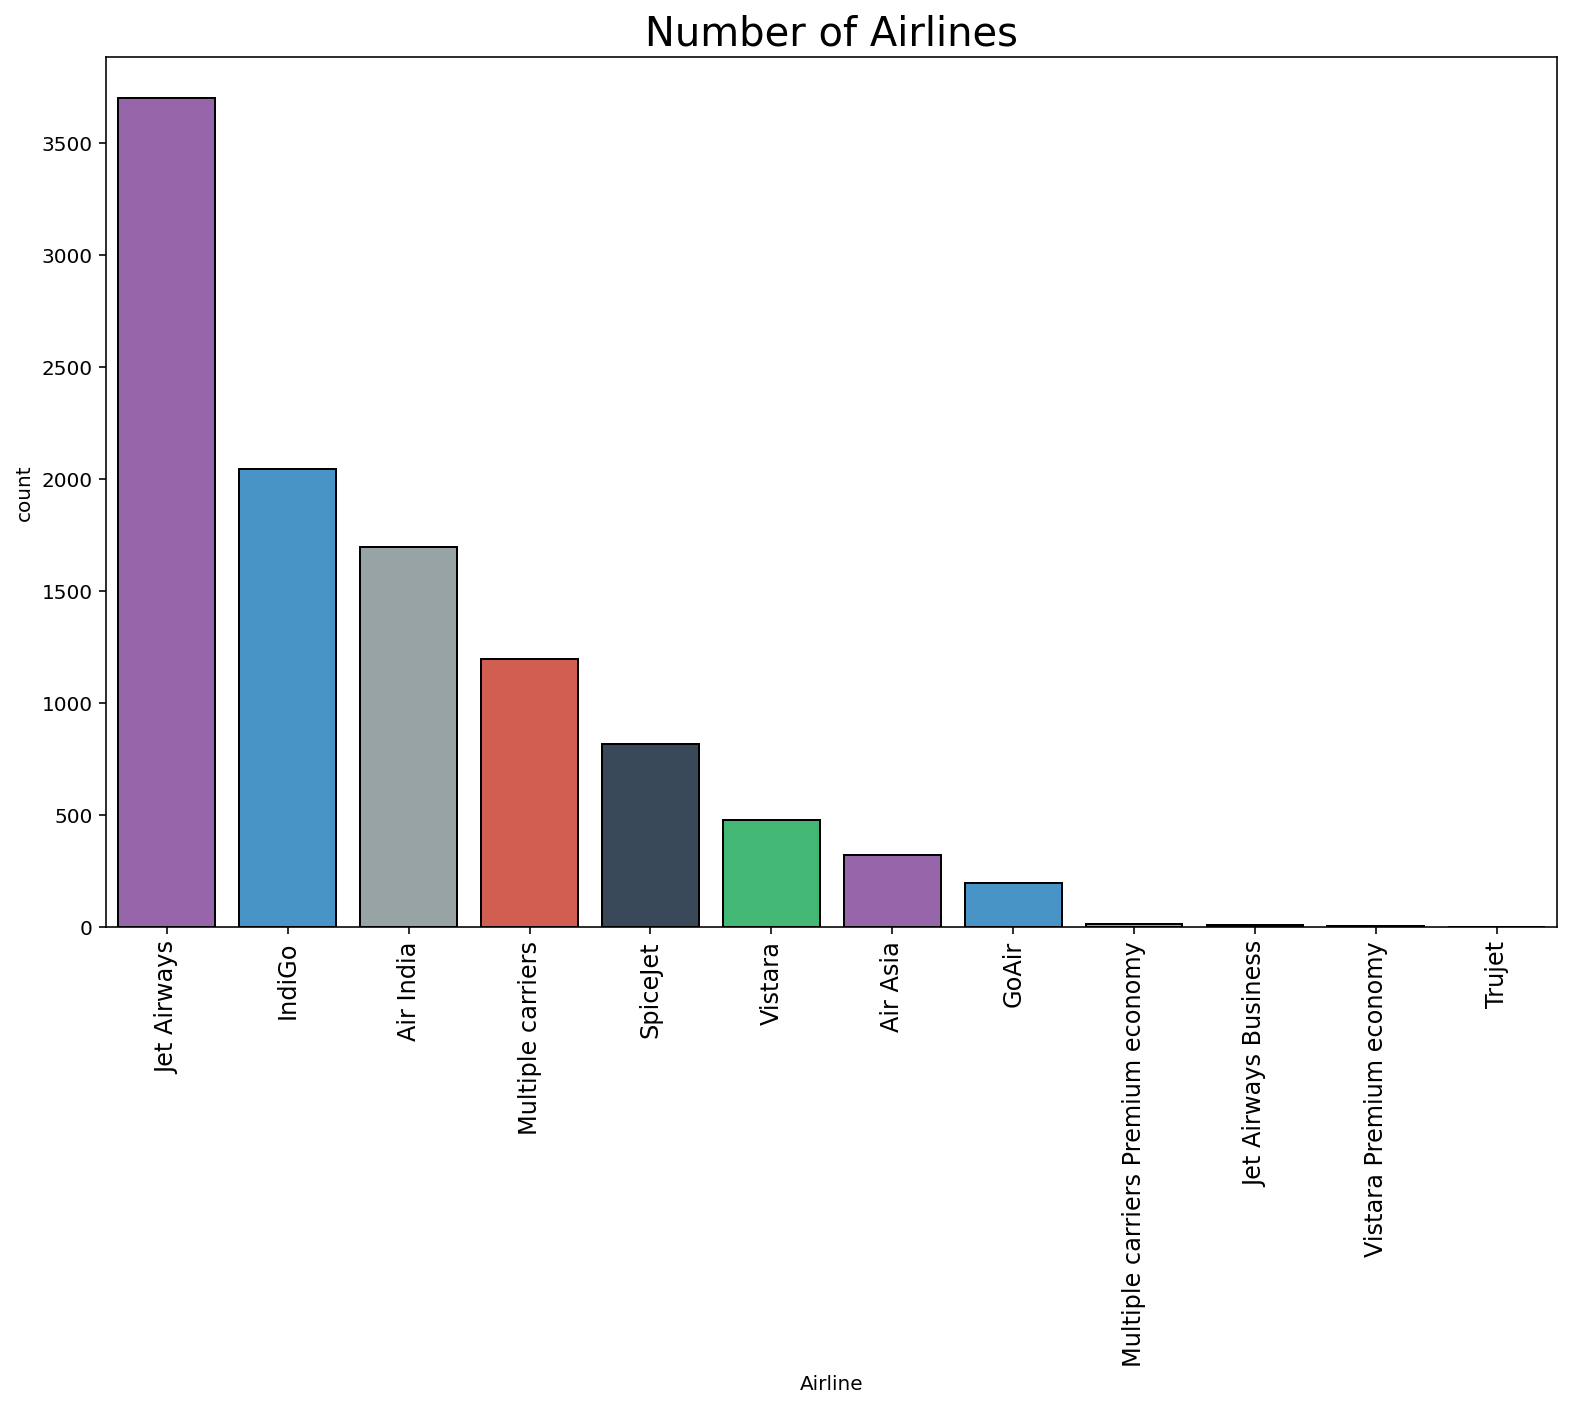

In [13]:
order= training_df['Airline'].value_counts().index
sns.countplot(data=training_df,x='Airline',order = order,palette=flatui,edgecolor = "black")
plt.title("Number of Airlines",fontsize=20)
plt.xticks(rotation=90,fontsize=12);

In [14]:
## How many Airlines are there in the dataset
training_df['Source'].value_counts().sort_values()

Chennai      381
Mumbai       697
Banglore    2179
Kolkata     2860
Delhi       4345
Name: Source, dtype: int64

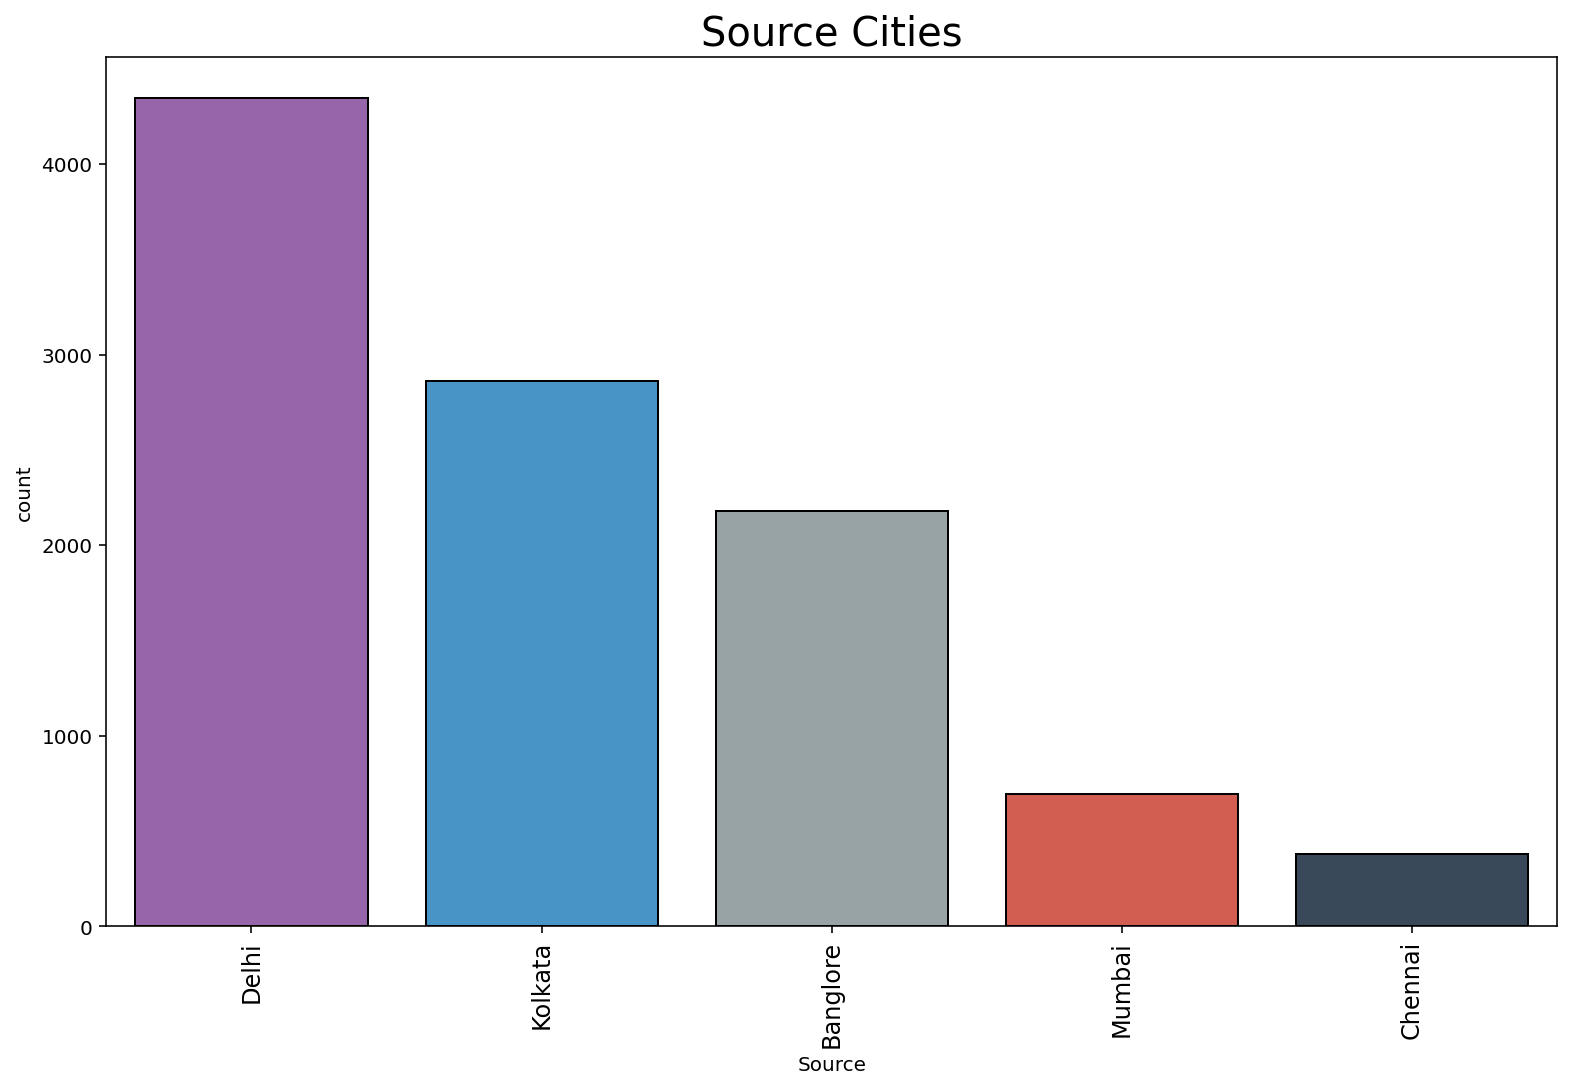

In [15]:

order= training_df['Source'].value_counts().index
sns.countplot(data=training_df,x='Source',order = order,palette= flatui,edgecolor = "black")
plt.title("Source Cities",fontsize=20)
plt.xticks(rotation=90,fontsize=12);

In [16]:
training_df['Destination'].value_counts().sort_values()

Kolkata       381
Hyderabad     697
New Delhi     914
Delhi        1265
Banglore     2860
Cochin       4345
Name: Destination, dtype: int64

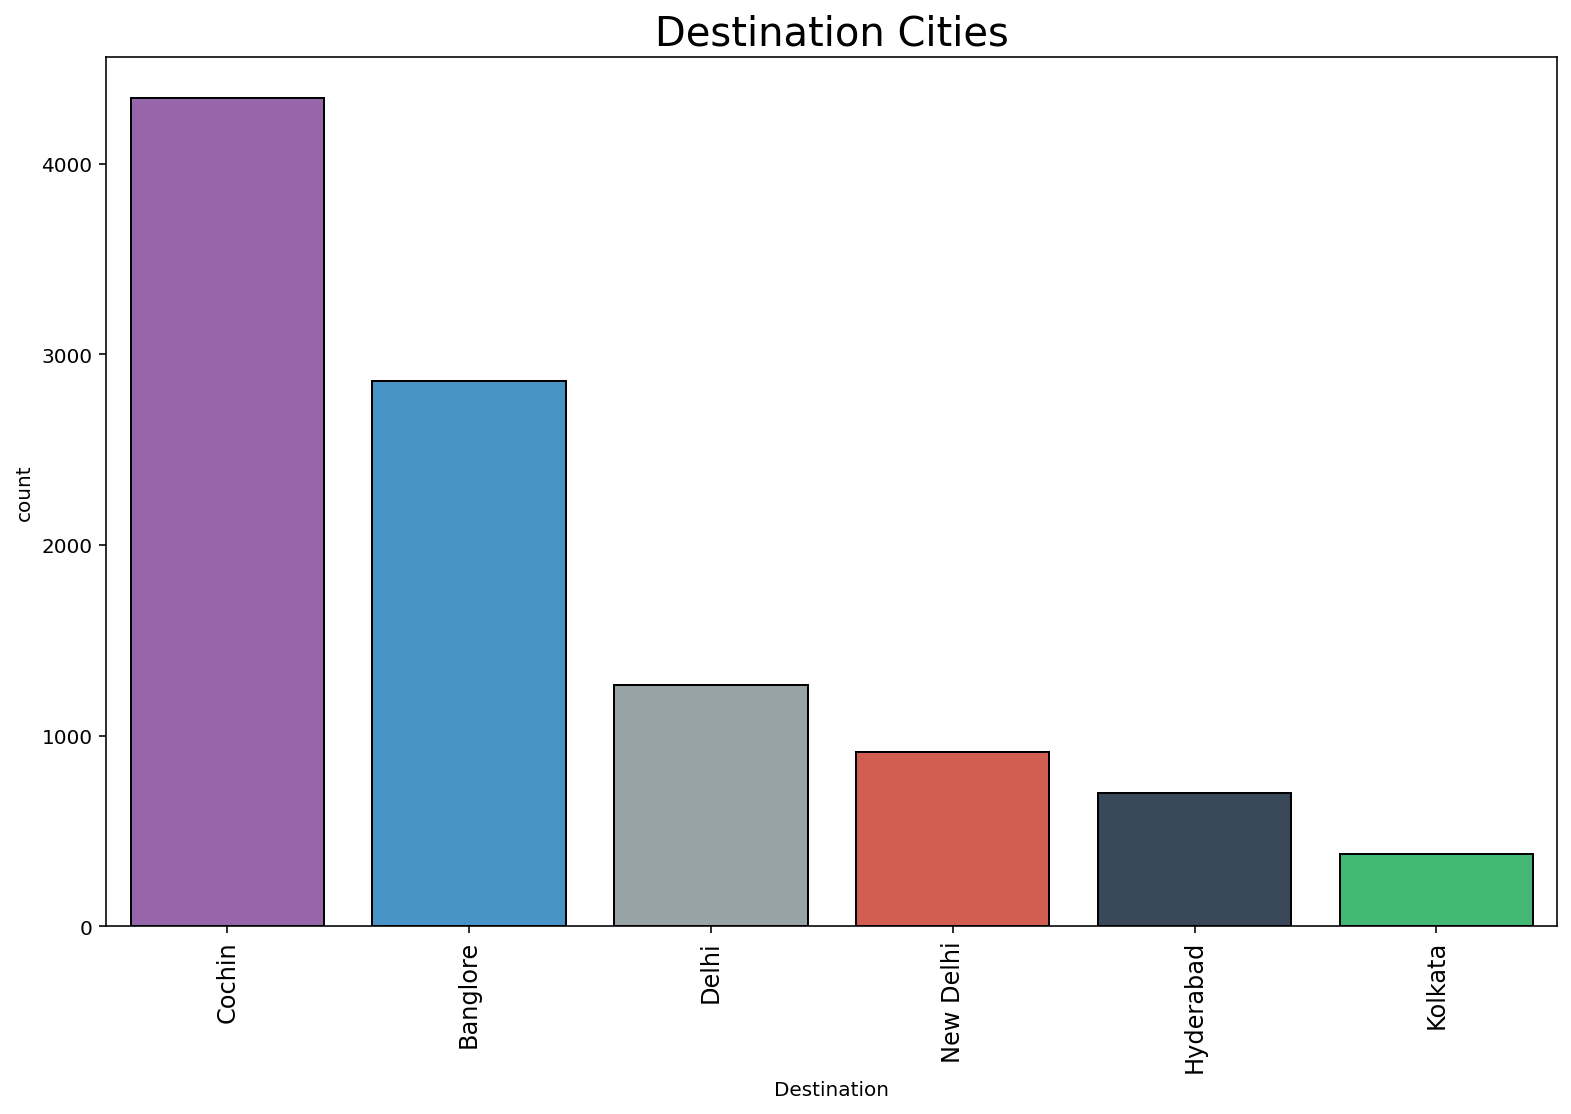

In [17]:
order= training_df['Destination'].value_counts().index
sns.countplot(data=training_df,x='Destination',order = order,palette= flatui,edgecolor = "black")
plt.title("Destination Cities",fontsize=20)
plt.xticks(rotation=90,fontsize=12);

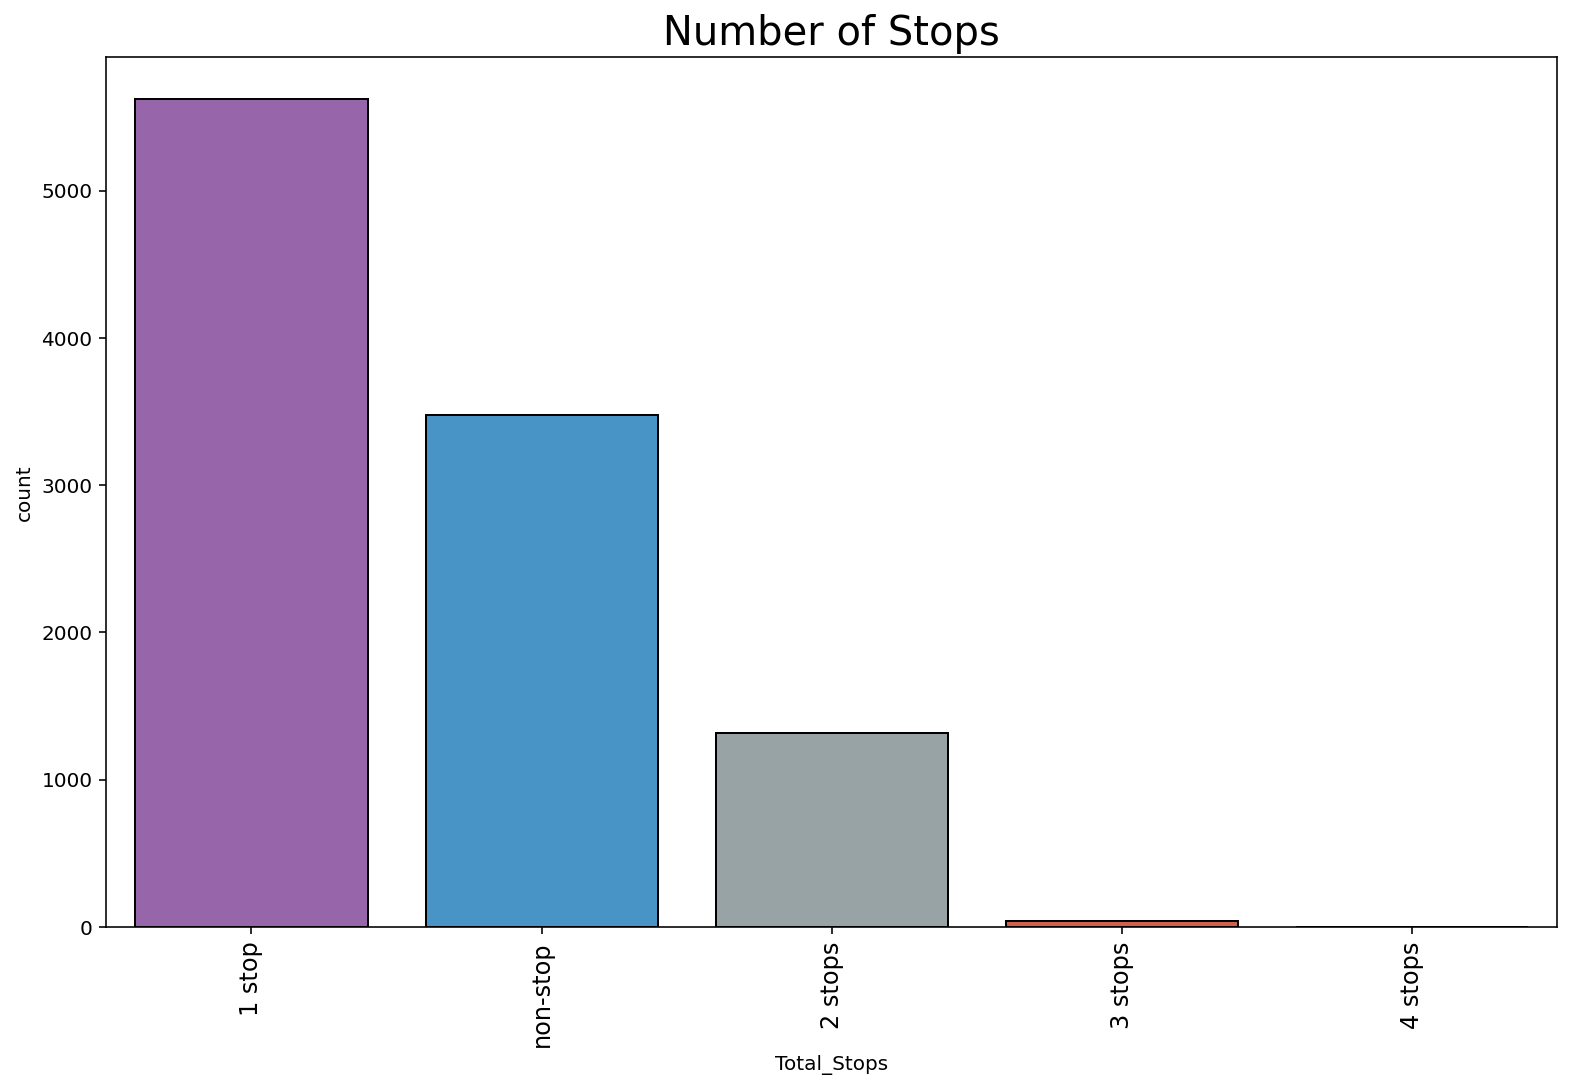

In [18]:
order= training_df['Total_Stops'].value_counts().index
sns.countplot(data=training_df,x='Total_Stops',order = order,palette= flatui,edgecolor = "black")
plt.title("Number of Stops",fontsize=20)
plt.xticks(rotation=90,fontsize=12);

In [19]:
# From the primary analysis we saw that date of journey is object which we need to change to date datatype for our analysis
## Creating more variables for better analysis by extracting day and month value from the date
training_df['Journey_day']=pd.to_datetime(training_df.Date_of_Journey,format='%d/%m/%Y').dt.day
training_df['Journey_month']=pd.to_datetime(training_df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [20]:
# Dropping the Date of Journey field from the dataframe as we have already extracted the required values from this varialbe
training_df.drop(["Date_of_Journey"],axis=1,inplace=True)
training_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
# Extracting Departure Hours and Mins from Dep_time
training_df['Dep_Hr']=pd.to_datetime(training_df.Dep_Time).dt.hour
training_df['Dep_Mins']=pd.to_datetime(training_df.Dep_Time).dt.minute

# Dropping the Dep_Time field from the dataframe as we have already extracted the required values from this varialbe
training_df.drop(["Dep_Time"],axis=1,inplace=True)
training_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
# Extracting Arrival Time Hours and Mins from Dep_time
training_df['Arrival_Hr']=pd.to_datetime(training_df.Arrival_Time).dt.hour
training_df['Arrival_Min']=pd.to_datetime(training_df.Arrival_Time).dt.minute

# Dropping the Dep_Time field from the dataframe as we have already extracted the required values from this varialbe
training_df.drop(["Arrival_Time"],axis=1,inplace=True)
training_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Mins,Arrival_Hr,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(training_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

training_df["Duration_hours"] = duration_hours
training_df["Duration_mins"] = duration_mins
training_df.drop(["Duration"], axis = 1, inplace = True)
training_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hr,Dep_Mins,Arrival_Hr,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


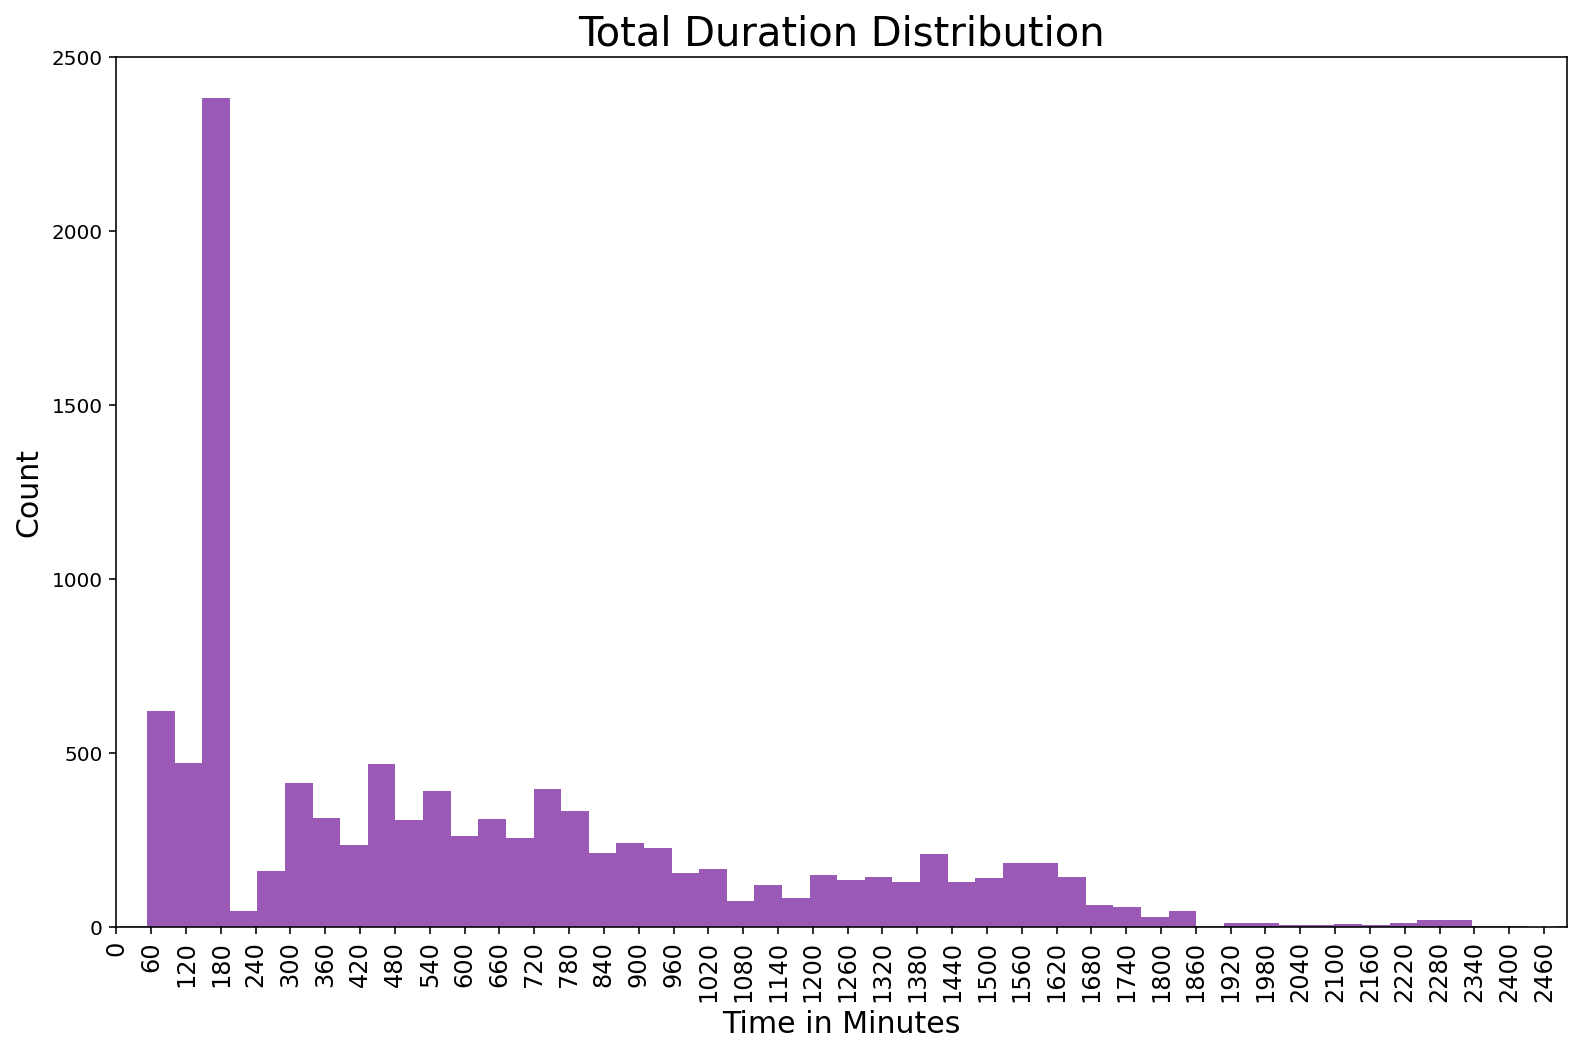

In [98]:
# Total duration in minutes
total_dur_mins =training_df.Duration_hours*60 + training_df.Duration_mins
total_dur_mins.plot(kind='hist',bins=60, xticks=np.arange(0,2500,60));
plt.title("Total Duration Distribution",fontsize=20)
plt.xlabel("Time in Minutes",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90,fontsize=12);
plt.xlim(0,2500);

### Bivariate Analysis

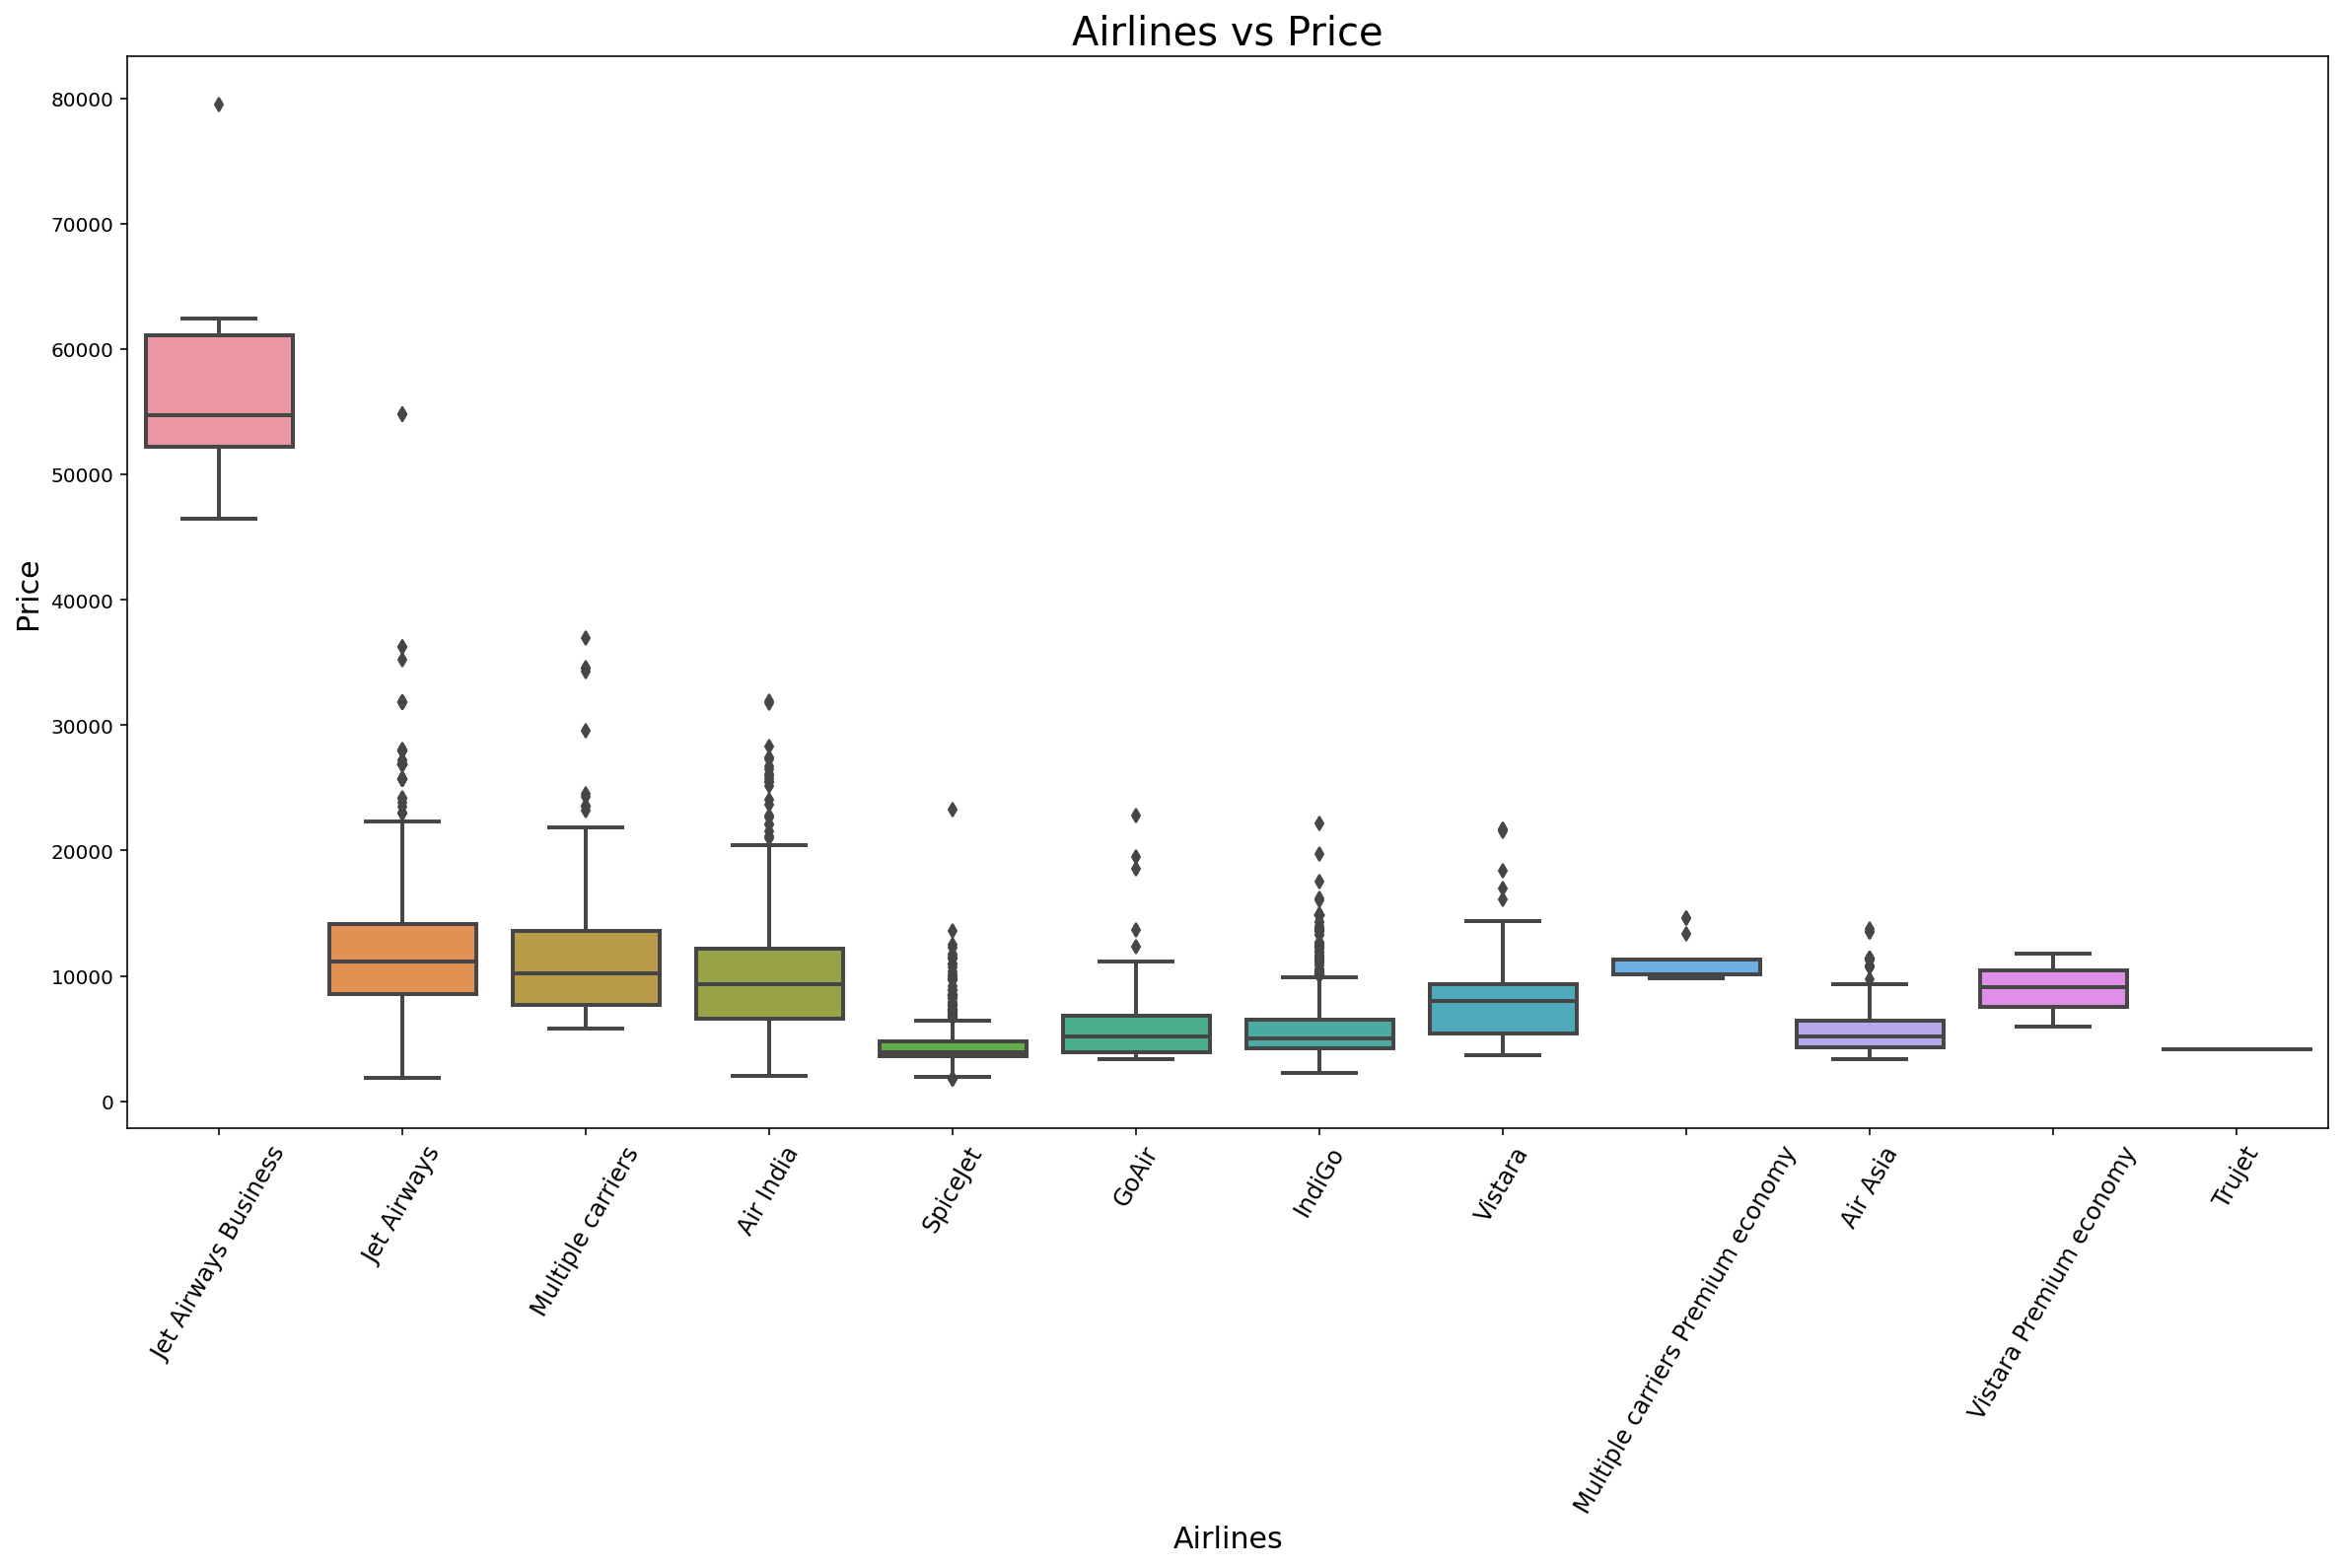

In [26]:
# Airline vs Price
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(y = "Price", x = "Airline", 
            data = training_df.sort_values("Price", ascending = False))
plt.xlabel("Airlines",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation=60,fontsize=12)
plt.title("Airlines vs Price", fontsize=20)
plt.show()

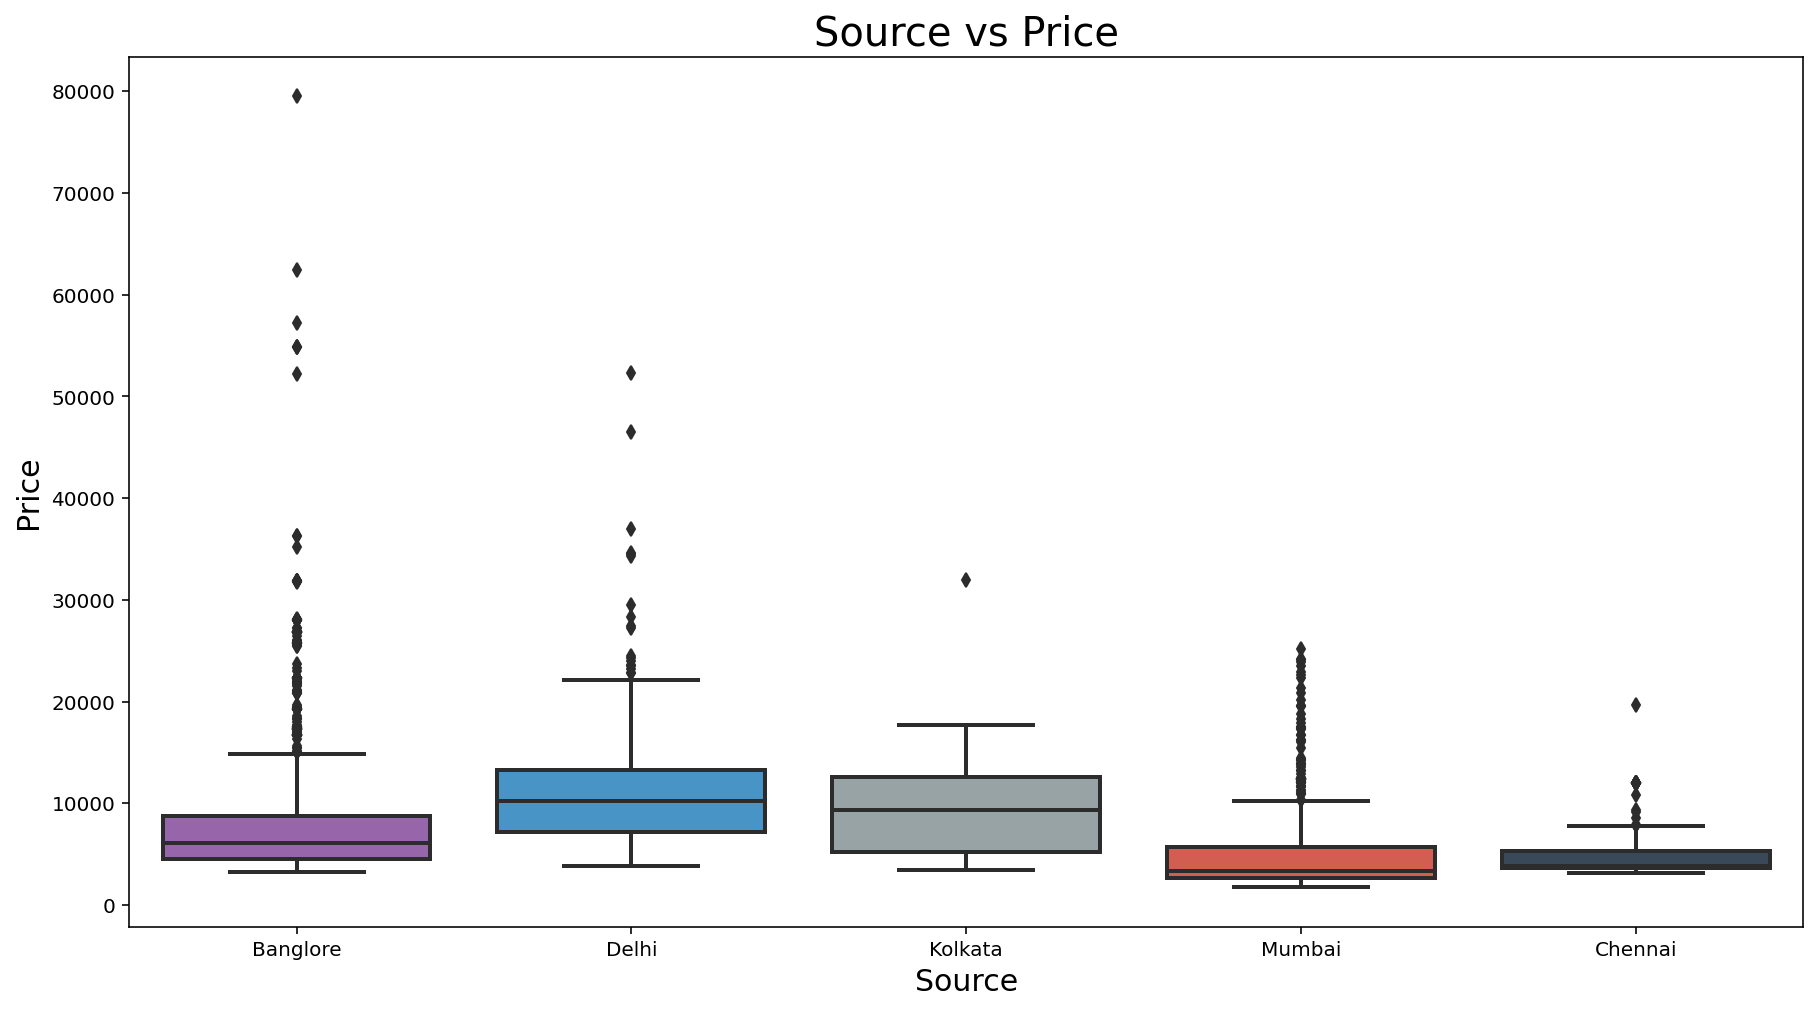

In [27]:
# Airline vs Price
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(y = "Price", x = "Source", 
            data = training_df.sort_values("Price", ascending = False))
plt.xlabel("Source",fontsize=15)
plt.ylabel("Price",fontsize=15)
#plt.xticks(rotation=90,fontsize=12)
plt.title("Source vs Price", fontsize=20)
plt.show()

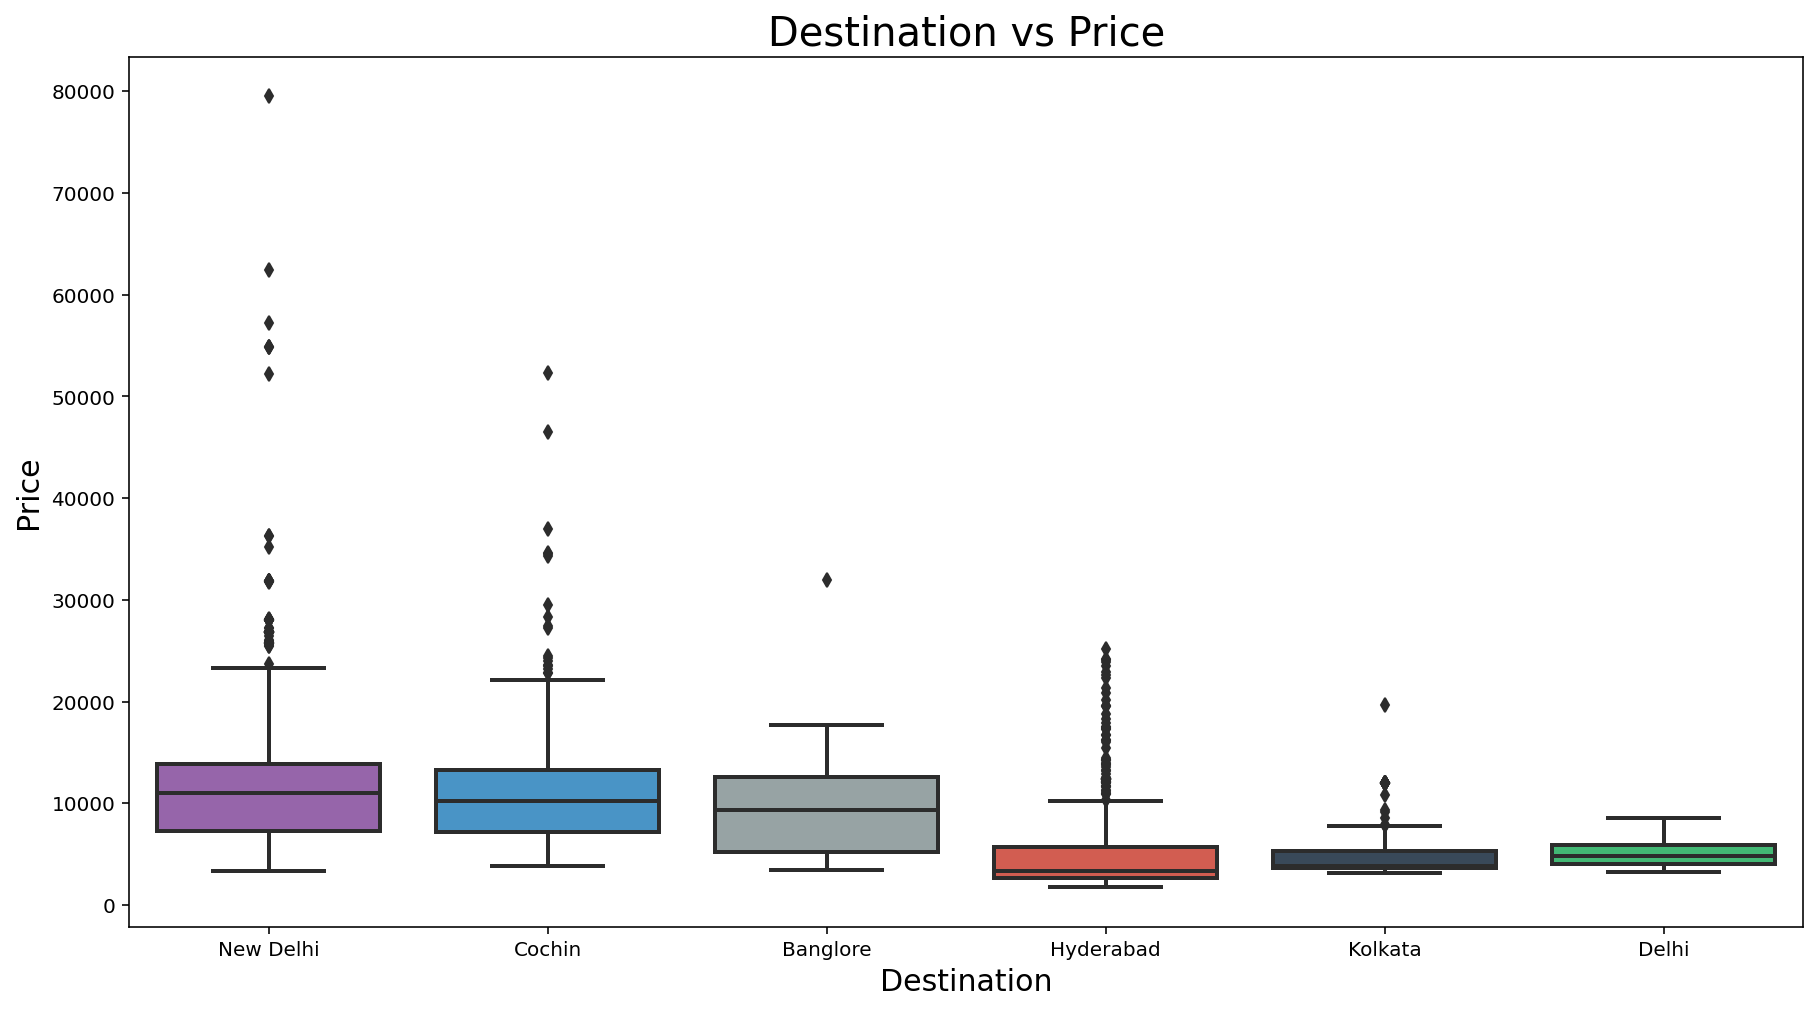

In [28]:
# Destination vs Price
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(y = "Price", x = "Destination", 
            data = training_df.sort_values("Price", ascending = False))
plt.xlabel("Destination",fontsize=15)
plt.ylabel("Price",fontsize=15)
#plt.xticks(rotation=90,fontsize=12)
plt.title("Destination vs Price", fontsize=20)
plt.show()

In [88]:
# Calculating 
#Min_duration = total_dur_mins.min()
#Max_duration= total_dur_mins.max()
#print("The minimum duration is:    {} min".format(Min_duration))
#print("The maximum duration is:    {:.2f} mins".format(Max_duration))
#bins=np.arange(0,total_dur_mins.max()+5,100)
#plt.hist(data=total_dur_mins,x=total_dur_mins,bins=bins,color= sns.color_palette()[2],edgecolor = "black");
#plt.xlabel('Duration in Minutes')
#plt.ylabel('Count of Flights')
#plt.title('Distibution of Duration')
#plt.xlim(0,3000);

In [30]:
# Destination vs Price
#fig, ax = plt.subplots(figsize = (15,8))
#sns.scatterplot(y = "total_dur_mins", x = "Price",data = training_df,hue="Source")
#plt.xlabel("Price",fontsize=15)
#plt.ylabel("Total Duration in Minutes",fontsize=15)
#plt.xticks(rotation=90,fontsize=12)
#plt.title("Total Duration vs Price", fontsize=20)
#plt.xlim(0,40000);
#plt.show()

In [31]:
# Destination vs Price
#fig, ax = plt.subplots(figsize = (15,8))
#sns.scatterplot(y = "total_dur_mins", x = "Price",data = training_df,hue="Destination")
#plt.xlabel("Price",fontsize=15)
#plt.ylabel("Total Duration in Minutes",fontsize=15)
#plt.xticks(rotation=90,fontsize=12)
#plt.title("Total Duration vs Price", fontsize=20)
#plt.xlim(0,40000);
#plt.show()

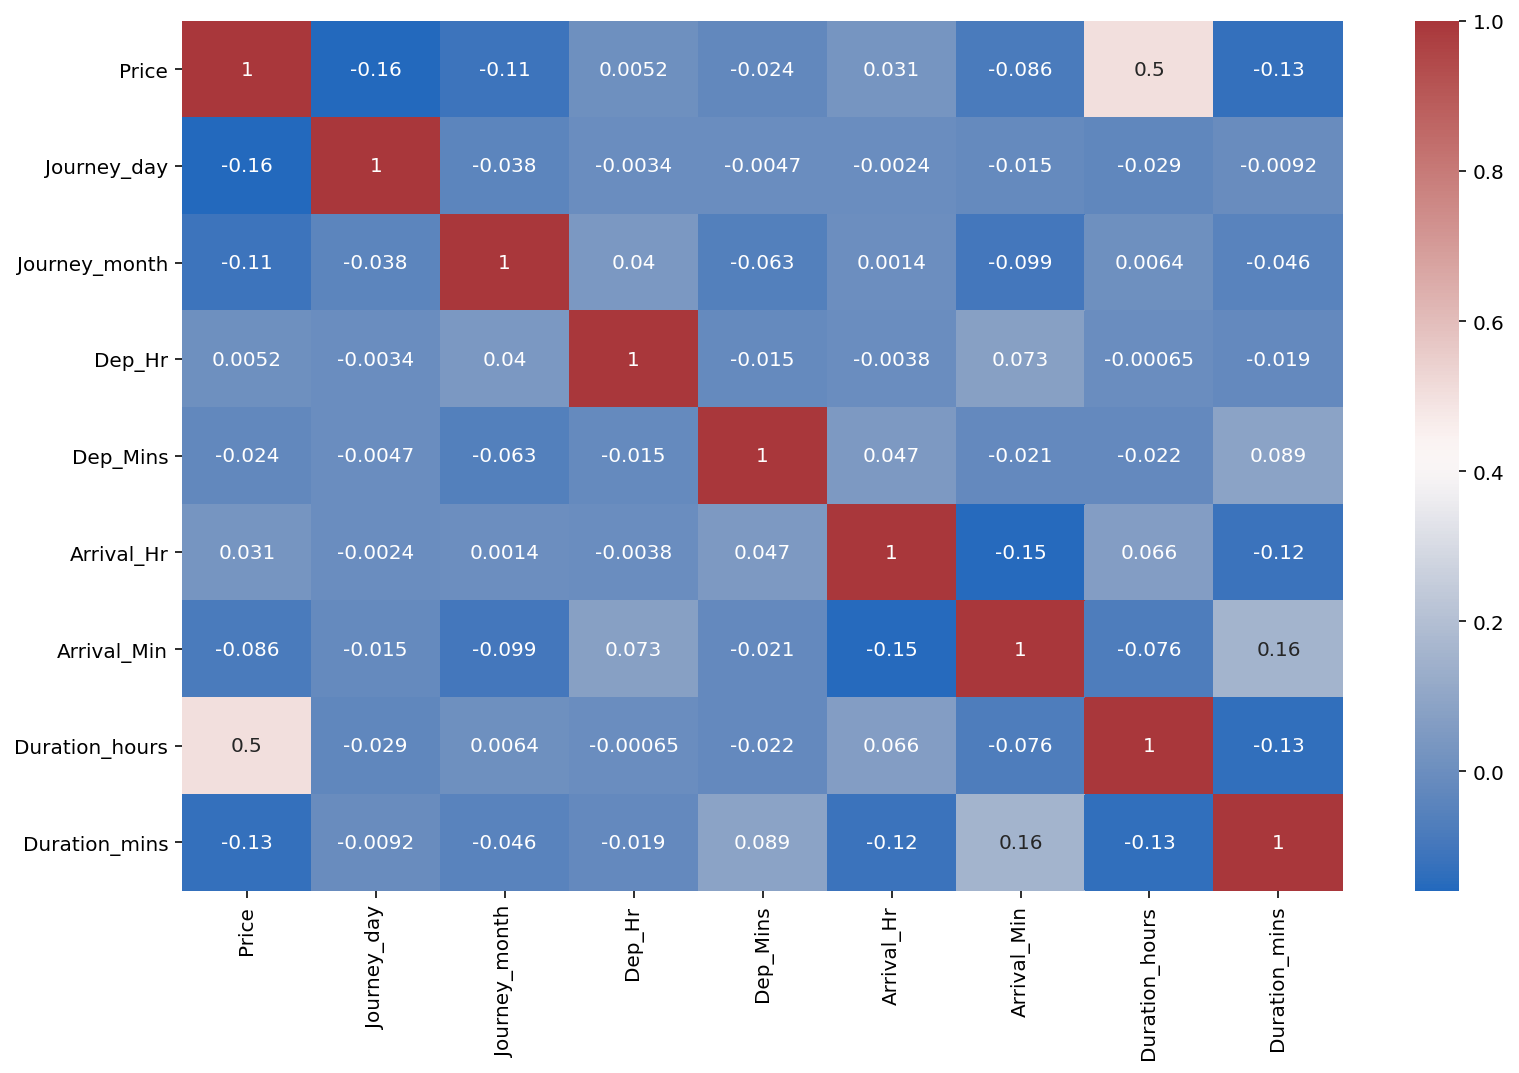

In [32]:
#heatmap
sns.heatmap(training_df.corr(),annot=True,cmap="vlag")
plt.show()

## Data Preprocessing

In [33]:
# As the route and total stops gives us the same infromation hence dropping 
training_df.drop(['Route','Additional_Info'],axis=1,inplace=True)
training_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Mins,Arrival_Hr,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [34]:
# Handling the categorical data
## Ordinal Data - Total stop here is ordinal data and hence need to handle differently while encoding

training_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [35]:
cat_feature= ['Airline','Source','Destination']
dummies=pd.get_dummies(training_df[cat_feature])
#dummies.drop(["Airline_Air Asia", "Source_Banglore", "Destination_Banglore"], axis = 1, inplace = True)
dummies

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Concating  both the dataframe and dropping the original categorical variables
trans_training_df = pd.concat([training_df, dummies], axis = 1)
trans_training_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
trans_training_df

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hr,Dep_Mins,Arrival_Hr,Arrival_Min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


## Testing Data Processing

In [37]:
testing_df=pd.read_excel(r'../input/Testing_Data.xlsx') # Reading the testing file in pandas dataframe
primary_analysis(testing_df) #primary analysis on data

**The dataset has 2671 rows and 10 columns.**

**The dataset has 26 duplicate rows.**

**The count of missing values in all variables:**
 
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64.

**The information about the dtypes of the variables:**
 
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object.


<function __main__.primary_analysis(df)>

In [38]:
testing_df.dropna(inplace=True)# Dropping the missing value

testing_df.drop_duplicates(inplace=True)# Dropping duplicates

# From the primary analysis we saw that date of journey is object which we need to change to date datatype for our analysis
## Creating more variables for better analysis by extracting day and month value from the date

testing_df['Journey_day']=pd.to_datetime(testing_df.Date_of_Journey,format='%d/%m/%Y').dt.day
testing_df['Journey_month']=pd.to_datetime(testing_df.Date_of_Journey,format='%d/%m/%Y').dt.month
testing_df.drop(["Date_of_Journey"],axis=1,inplace=True)


# Extracting Departure Hours and Mins from Dep_time

testing_df['Dep_Hr']=pd.to_datetime(testing_df.Dep_Time).dt.hour
testing_df['Dep_Mins']=pd.to_datetime(testing_df.Dep_Time).dt.minute


# Dropping the Dep_Time field from the dataframe as we have already extracted the required values from this varialbe

testing_df.drop(["Dep_Time"],axis=1,inplace=True)

# Extracting Arrival Time Hours and Mins from Dep_time

testing_df['Arrival_Hr']=pd.to_datetime(testing_df.Arrival_Time).dt.hour
testing_df['Arrival_Min']=pd.to_datetime(testing_df.Arrival_Time).dt.minute

# Dropping the Dep_Time field from the dataframe as we have already extracted the required values from this varialbe

testing_df.drop(["Arrival_Time"],axis=1,inplace=True)

# Assigning and converting Duration column into list
duration = list(testing_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding duration_hours and duration_mins list to train_data dataframe

testing_df["Duration_hours"] = duration_hours
testing_df["Duration_mins"] = duration_mins
testing_df.drop(["Duration"], axis = 1, inplace = True)

# Total duration in minutes
#testing_df['total_dur_mins'] =testing_df.Duration_hours*60 + testing_df.Duration_mins
testing_df.drop(['Route','Additional_Info'],axis=1,inplace=True)

#endcoding the ordinal category data
testing_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# encoding nominal categorical data
cat_feature= ['Airline','Source','Destination']
dummies=pd.get_dummies(testing_df[cat_feature])

# Concating  both the dataframe and dropping the original categorical variables

trans_testing_df = pd.concat([testing_df, dummies], axis = 1)
trans_testing_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [39]:
trans_testing_df.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hr,Dep_Mins,Arrival_Hr,Arrival_Min,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,...,0,0,0,0,0,0,1,0,0,0


In [40]:
trans_testing_df.shape

(2645, 31)

## Saving the transformed training and testing data

In [41]:
trans_testing_df.to_csv(r'../input/transformed_testing_data.csv',index=False) # Testing data

In [42]:
trans_training_df.to_csv(r'../input/transformed_training_data.csv',index=False)# Training data

## Baseline Model Creation

In [43]:
tran_test_df=pd.read_csv(r'..\input\transformed_testing_data.csv')   
tran_train_df=pd.read_csv(r'..\input\transformed_training_data.csv')  

#importing the library for model creating

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Splitting the dataset into training and testing
X= tran_train_df.drop('Price',axis=1)
y=tran_train_df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

# Test options and evaluation metric
num_folds = 10
#seed = 7
scoring = 'neg_root_mean_squared_error'

# Creating list of model
models=[]
models.append(('LR',LinearRegression()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFR',RandomForestRegressor()))


#evaluating the models
 
result=[]
names=[]
for name,model in models:
    kfolds=KFold(n_splits=num_folds)
    cv_results=cross_val_score(model,X_train,y_train, cv= kfolds,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -2887.105017 (160.197747)
DTR: -2512.919613 (214.789254)
RFR: -1986.912492 (235.735337)


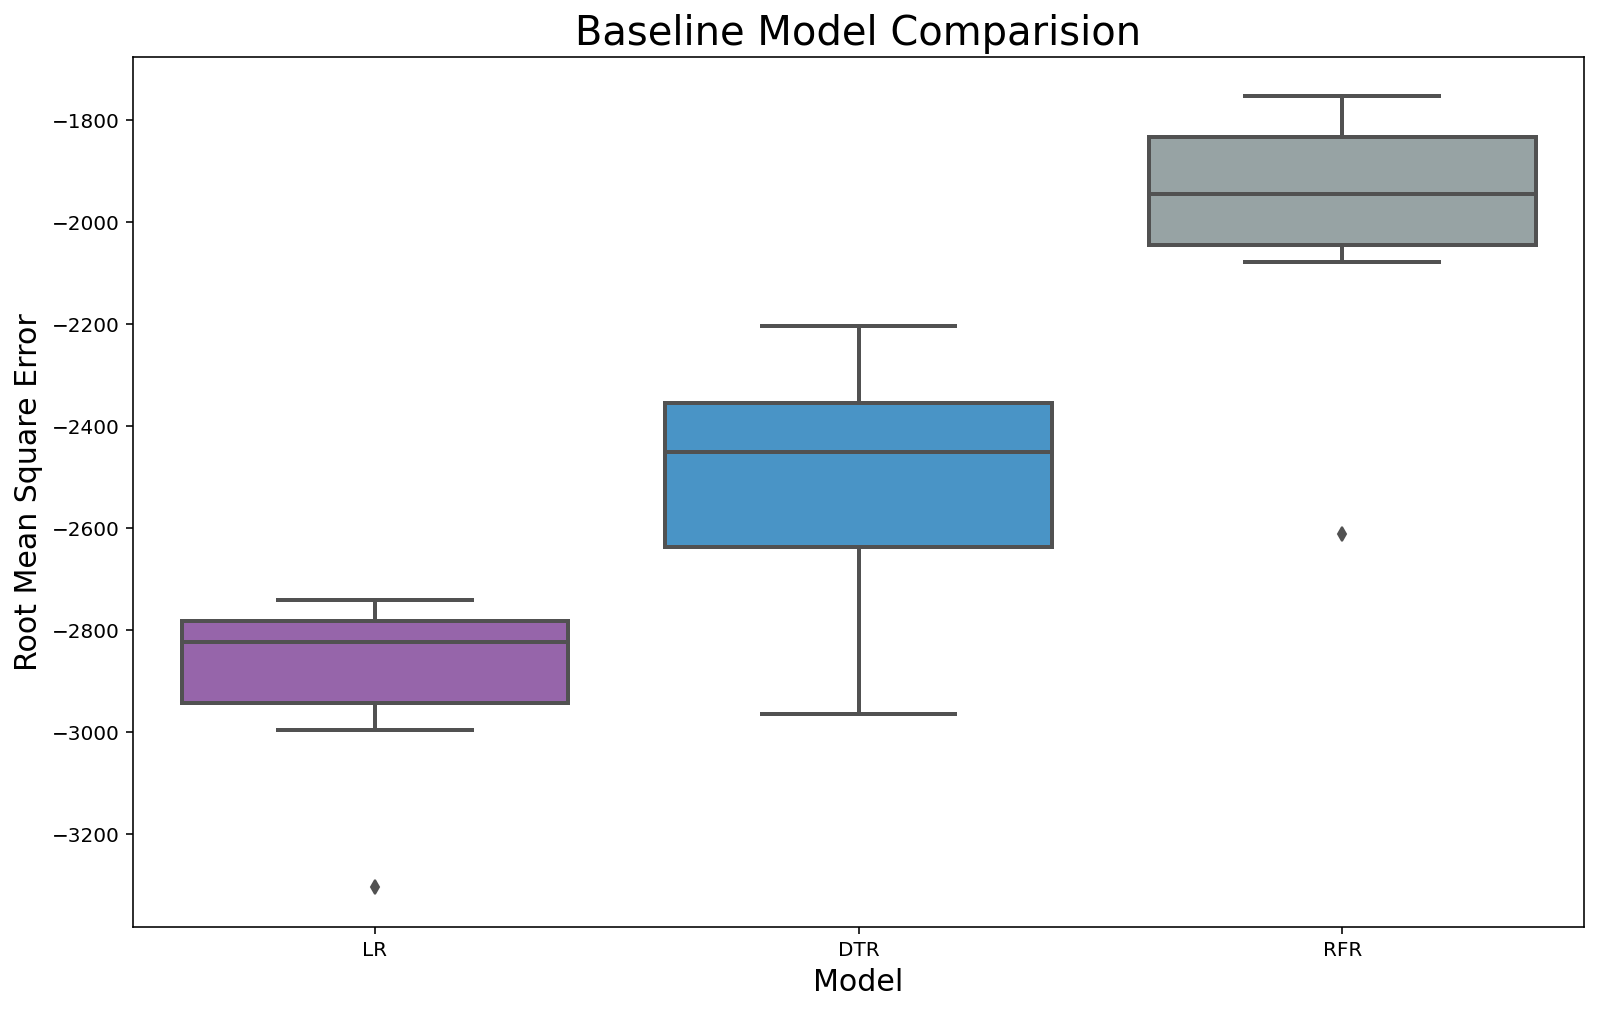

In [44]:
## Comparing Models
baseline_plot =sns.boxplot(data= result)
plt.title("Baseline Model Comparision", fontsize=20)
plt.xlabel("Model",fontsize=15)
plt.ylabel("Root Mean Square Error",fontsize=15)
baseline_plot.set_xticklabels(names)
plt.show()

### Model - Random Forest Regression 

In [45]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
rfr.feature_importances_

array([3.13270997e-02, 1.47199728e-01, 5.37679501e-02, 3.18318279e-02,
       2.32845998e-02, 3.13761097e-02, 1.85563341e-02, 4.32318436e-01,
       1.96833739e-02, 1.02966569e-03, 4.48143416e-03, 1.23319637e-03,
       8.06701340e-03, 6.44084789e-02, 5.66277702e-02, 2.10624357e-02,
       8.46059751e-04, 2.47100820e-03, 5.68045301e-06, 3.92078345e-03,
       6.89436025e-05, 1.00526371e-02, 6.46964156e-04, 2.02358554e-03,
       2.38005193e-03, 2.82657151e-03, 2.19773757e-03, 2.19508125e-03,
       1.40952475e-04, 3.18409524e-03, 6.16252496e-04, 2.01681415e-02])

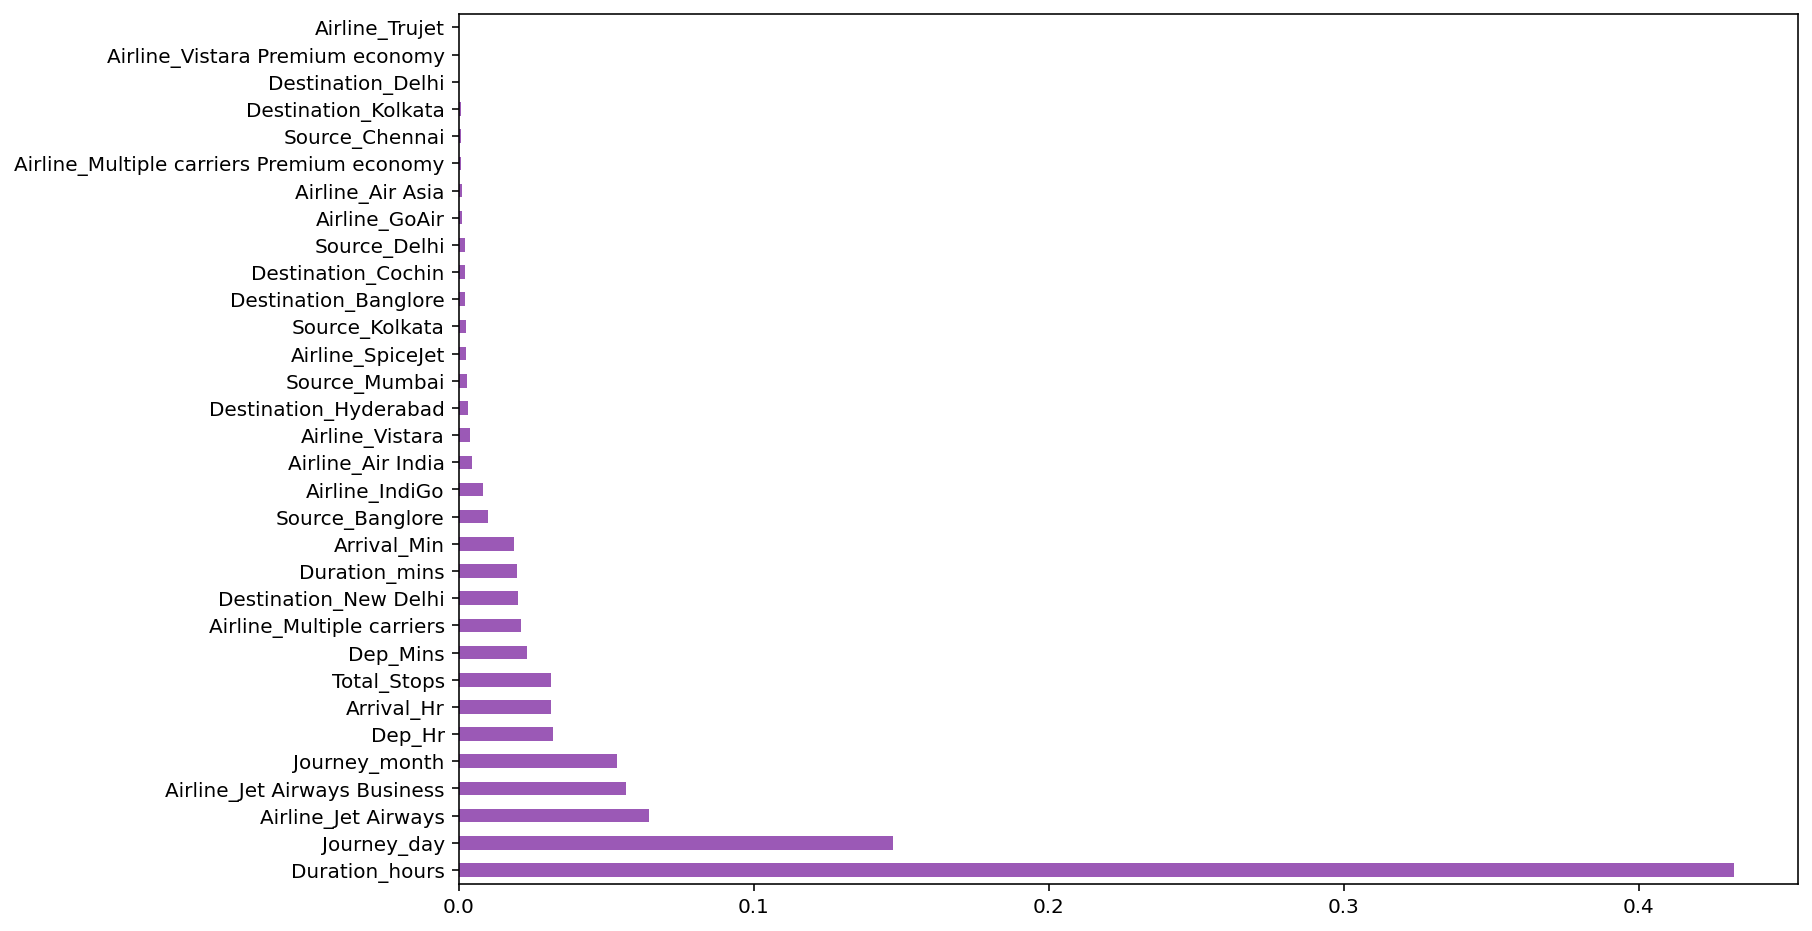

In [47]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

In [48]:
y_pred=rfr.predict(X_test)

In [49]:
rfr.score(X_train,y_train)

0.955195109373427

In [50]:
rfr.score(X_test,y_test)

0.783704106102604

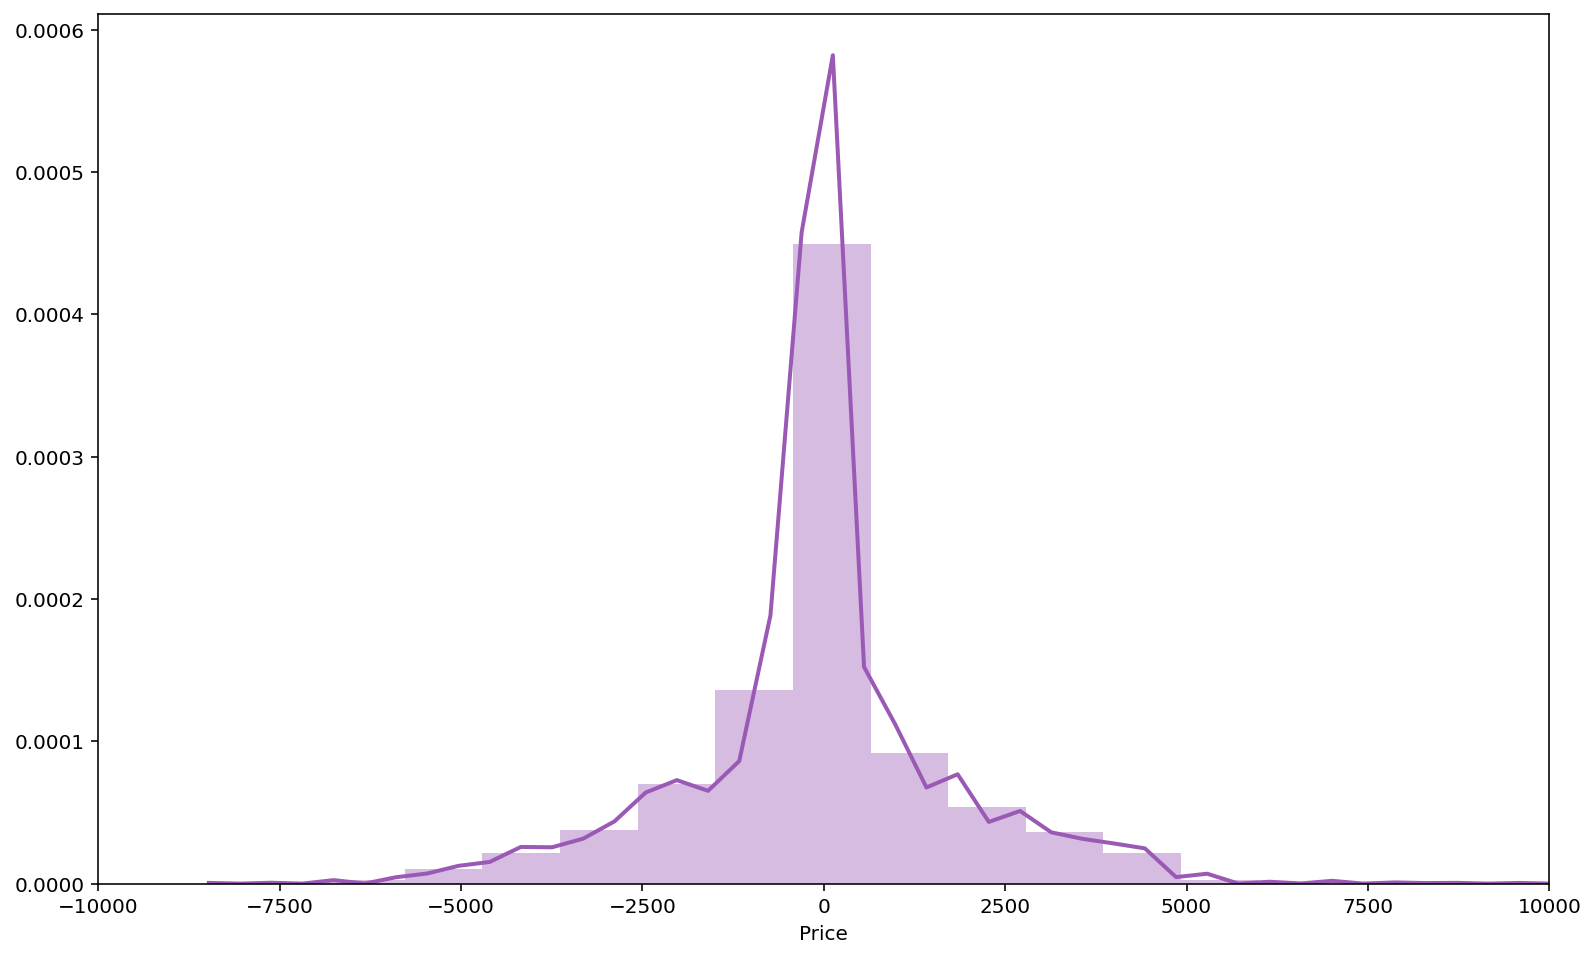

In [51]:
sns.distplot(y_test-y_pred)
plt.xlim(-10000,10000);
plt.show()

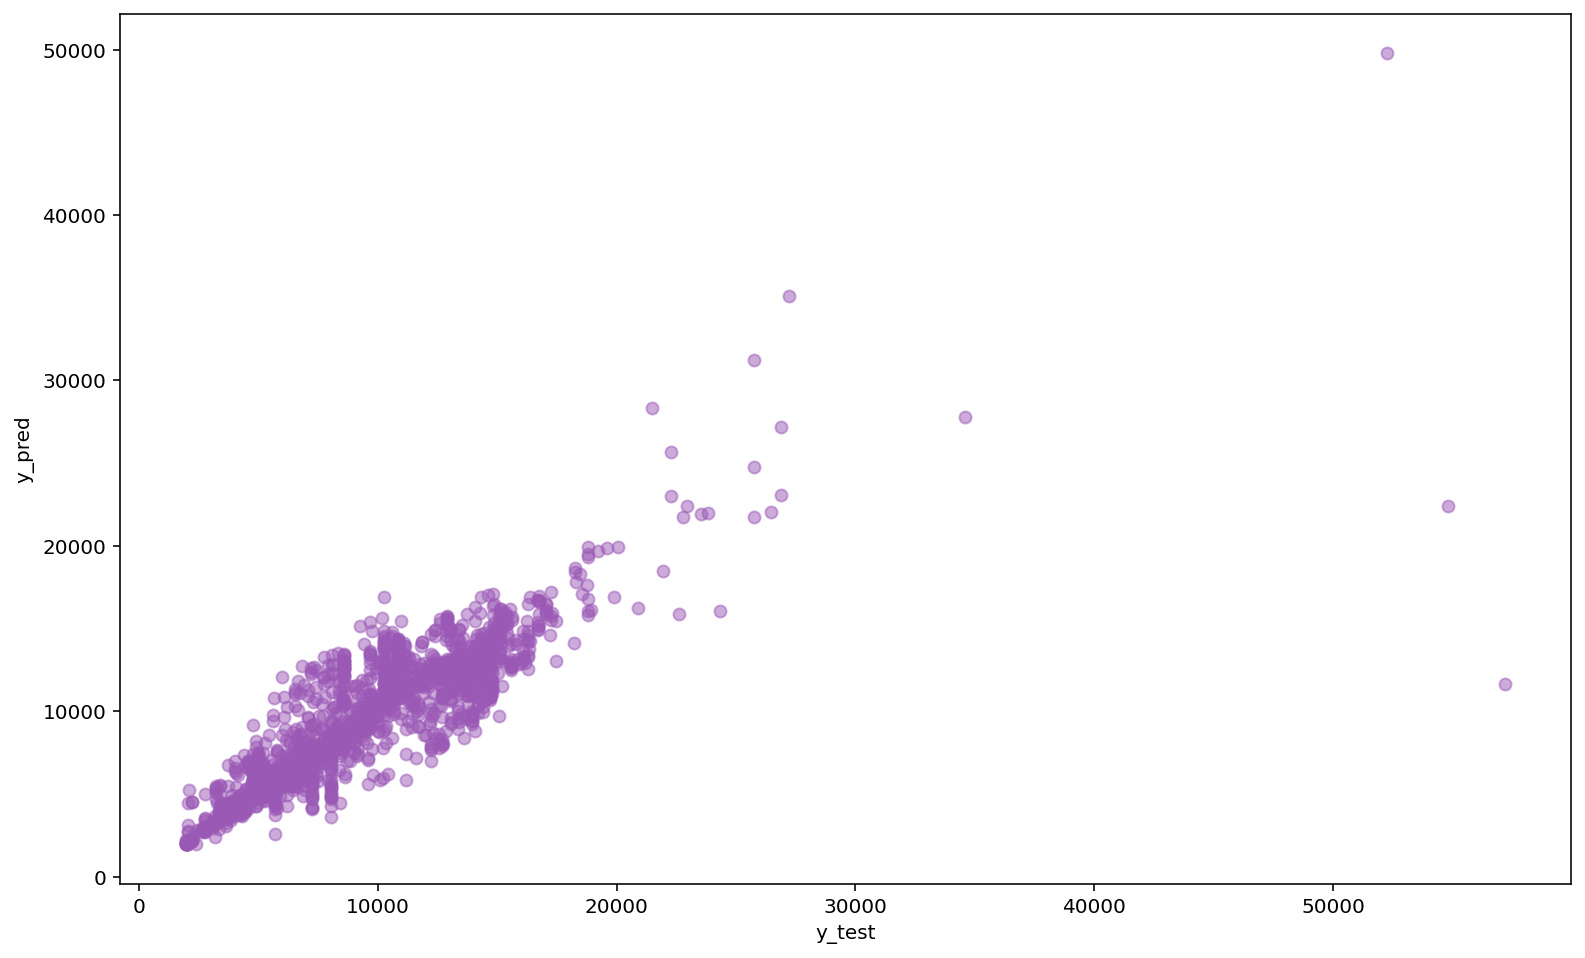

In [52]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1165.2941830147079
MSE: 4523013.514040605
RMSE: 2126.7377633456845


In [54]:
metrics.r2_score(y_test, y_pred)

0.783704106102604

## Hyperparameter Tuning

### Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30],
               'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False],
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]}]

In [56]:
grid_search=GridSearchCV(rfr,param_grid,cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [58]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
grid_search.cv_results_

{'mean_fit_time': array([0.02419839, 0.0703691 , 0.19242182, 0.02699575, 0.07391315,
        0.211801  , 0.02497272, 0.07405968, 0.22268414, 0.02938991,
        0.09203038, 0.26558104, 0.03059015, 0.0954761 , 0.03372087,
        0.0975266 , 0.0355176 , 0.10743847]),
 'std_fit_time': array([0.00062436, 0.00400779, 0.00740704, 0.00379888, 0.00358432,
        0.01468341, 0.00255903, 0.00268345, 0.01125272, 0.00447243,
        0.00270644, 0.01526536, 0.00550602, 0.00574997, 0.00538636,
        0.00311225, 0.00202214, 0.00563607]),
 'mean_score_time': array([0.00050731, 0.0049305 , 0.01051321, 0.00264726, 0.00336909,
        0.01007986, 0.00040011, 0.00159998, 0.00975094, 0.        ,
        0.0057653 , 0.01057129, 0.0019783 , 0.00728483, 0.00287037,
        0.00374174, 0.00328631, 0.0058713 ]),
 'std_score_time': array([0.00101461, 0.00274453, 0.00111082, 0.00271996, 0.00385419,
        0.00306454, 0.00080023, 0.00319996, 0.00242135, 0.        ,
        0.00120859, 0.00139945, 0.00309987, 

In [60]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50.49257726286089 {'max_features': 2, 'n_estimators': 3}
47.847472999585726 {'max_features': 2, 'n_estimators': 10}
47.15919920643467 {'max_features': 2, 'n_estimators': 30}
50.22970868220314 {'max_features': 4, 'n_estimators': 3}
47.08798593347285 {'max_features': 4, 'n_estimators': 10}
46.47806900099798 {'max_features': 4, 'n_estimators': 30}
49.01696221995916 {'max_features': 6, 'n_estimators': 3}
46.54115303558332 {'max_features': 6, 'n_estimators': 10}
46.105170156420236 {'max_features': 6, 'n_estimators': 30}
48.9553303420047 {'max_features': 8, 'n_estimators': 3}
46.03661862977791 {'max_features': 8, 'n_estimators': 10}
45.37160242001767 {'max_features': 8, 'n_estimators': 30}
50.67320874417472 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
48.82573452157195 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
50.11579345767051 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
48.37910645224376 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### Random Search

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfr,
                               param_distributions = random_grid,
                               scoring='neg_root_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [65]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [66]:
prediction = rf_random.predict(X_test)

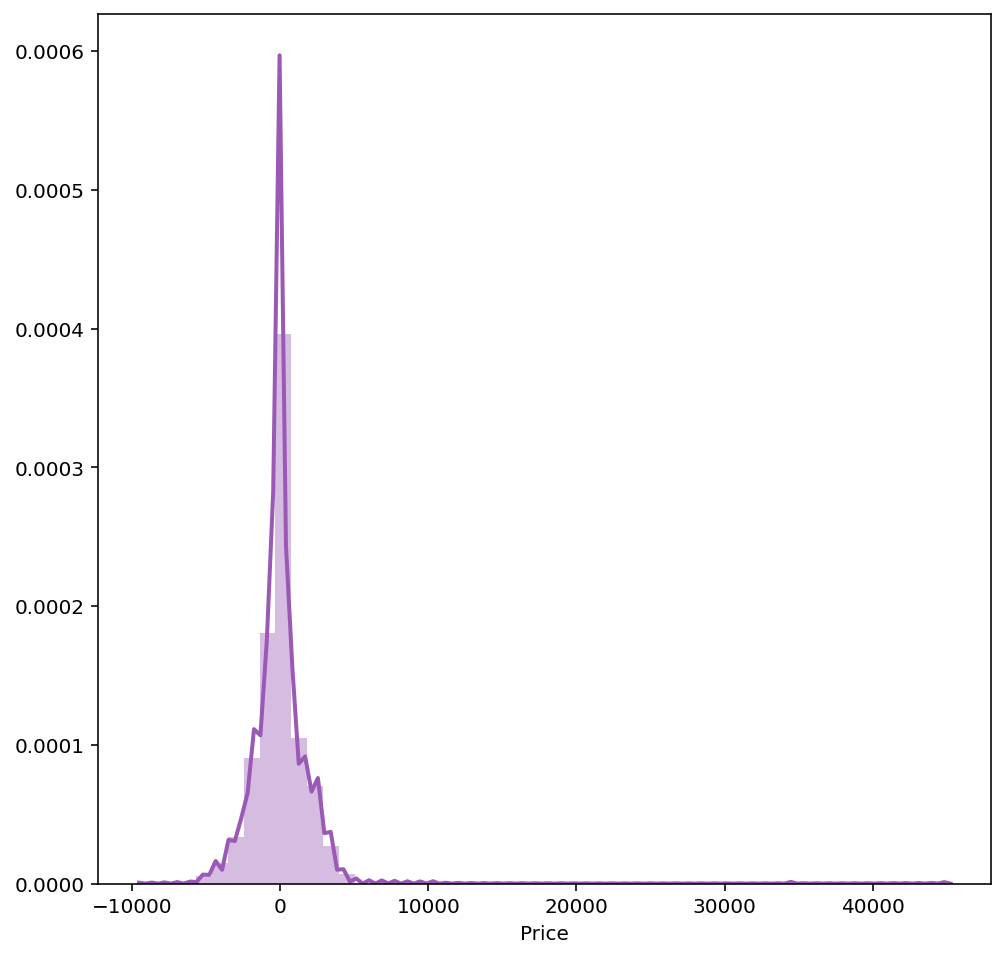

In [67]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

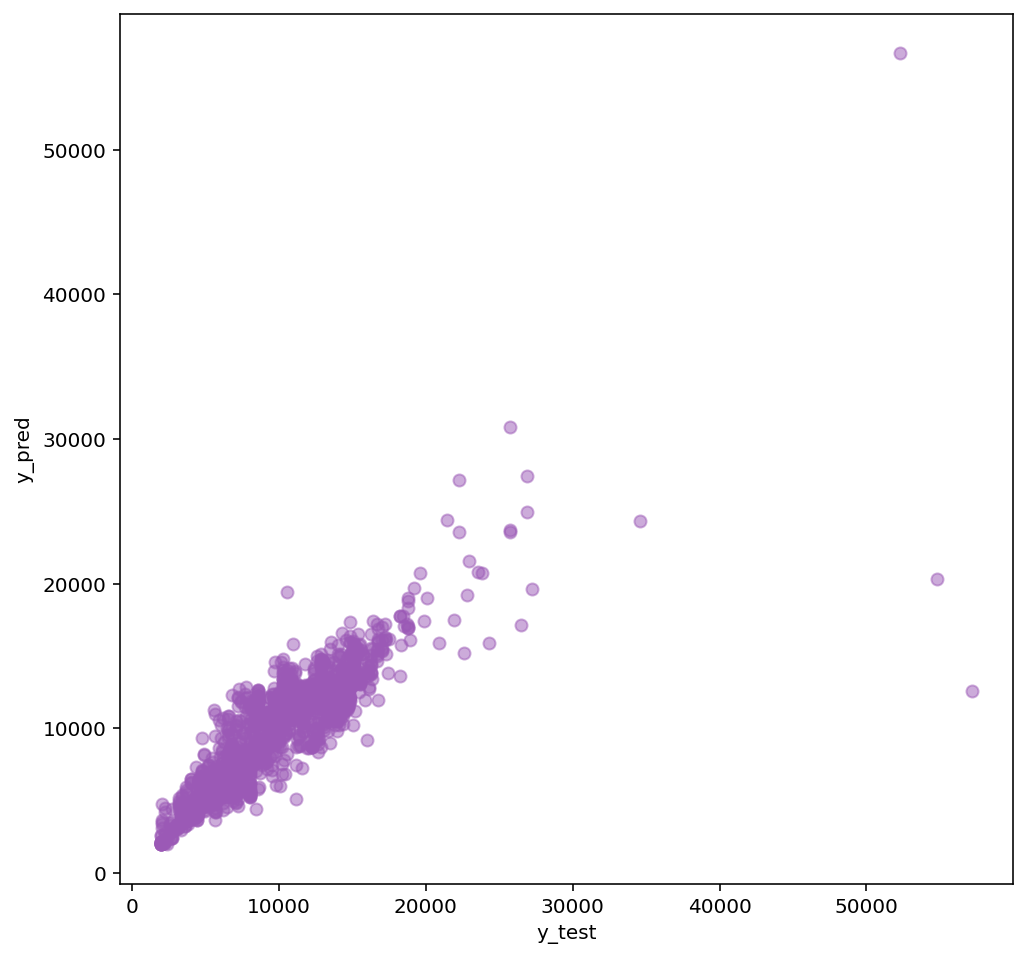

In [68]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1119.3509612618072
MSE: 4077379.199899321
RMSE: 2019.2521387630918


In [70]:
metrics.r2_score(y_test, prediction)

0.8050148698288954

## Saving the model

In [81]:
import pickle
file = open('flight_pred.pkl','wb')
pickle.dump(rf_random,file)

In [82]:
model=open('flight_pred.pkl','rb')
rf_model=pickle.load(model)

In [83]:
y_prediction=rf_model.predict(X_test)

In [84]:
metrics.r2_score(y_test,y_prediction)

0.8050148698288954

In [75]:
rf_random.estimator.feature_importances_

array([3.13270997e-02, 1.47199728e-01, 5.37679501e-02, 3.18318279e-02,
       2.32845998e-02, 3.13761097e-02, 1.85563341e-02, 4.32318436e-01,
       1.96833739e-02, 1.02966569e-03, 4.48143416e-03, 1.23319637e-03,
       8.06701340e-03, 6.44084789e-02, 5.66277702e-02, 2.10624357e-02,
       8.46059751e-04, 2.47100820e-03, 5.68045301e-06, 3.92078345e-03,
       6.89436025e-05, 1.00526371e-02, 6.46964156e-04, 2.02358554e-03,
       2.38005193e-03, 2.82657151e-03, 2.19773757e-03, 2.19508125e-03,
       1.40952475e-04, 3.18409524e-03, 6.16252496e-04, 2.01681415e-02])

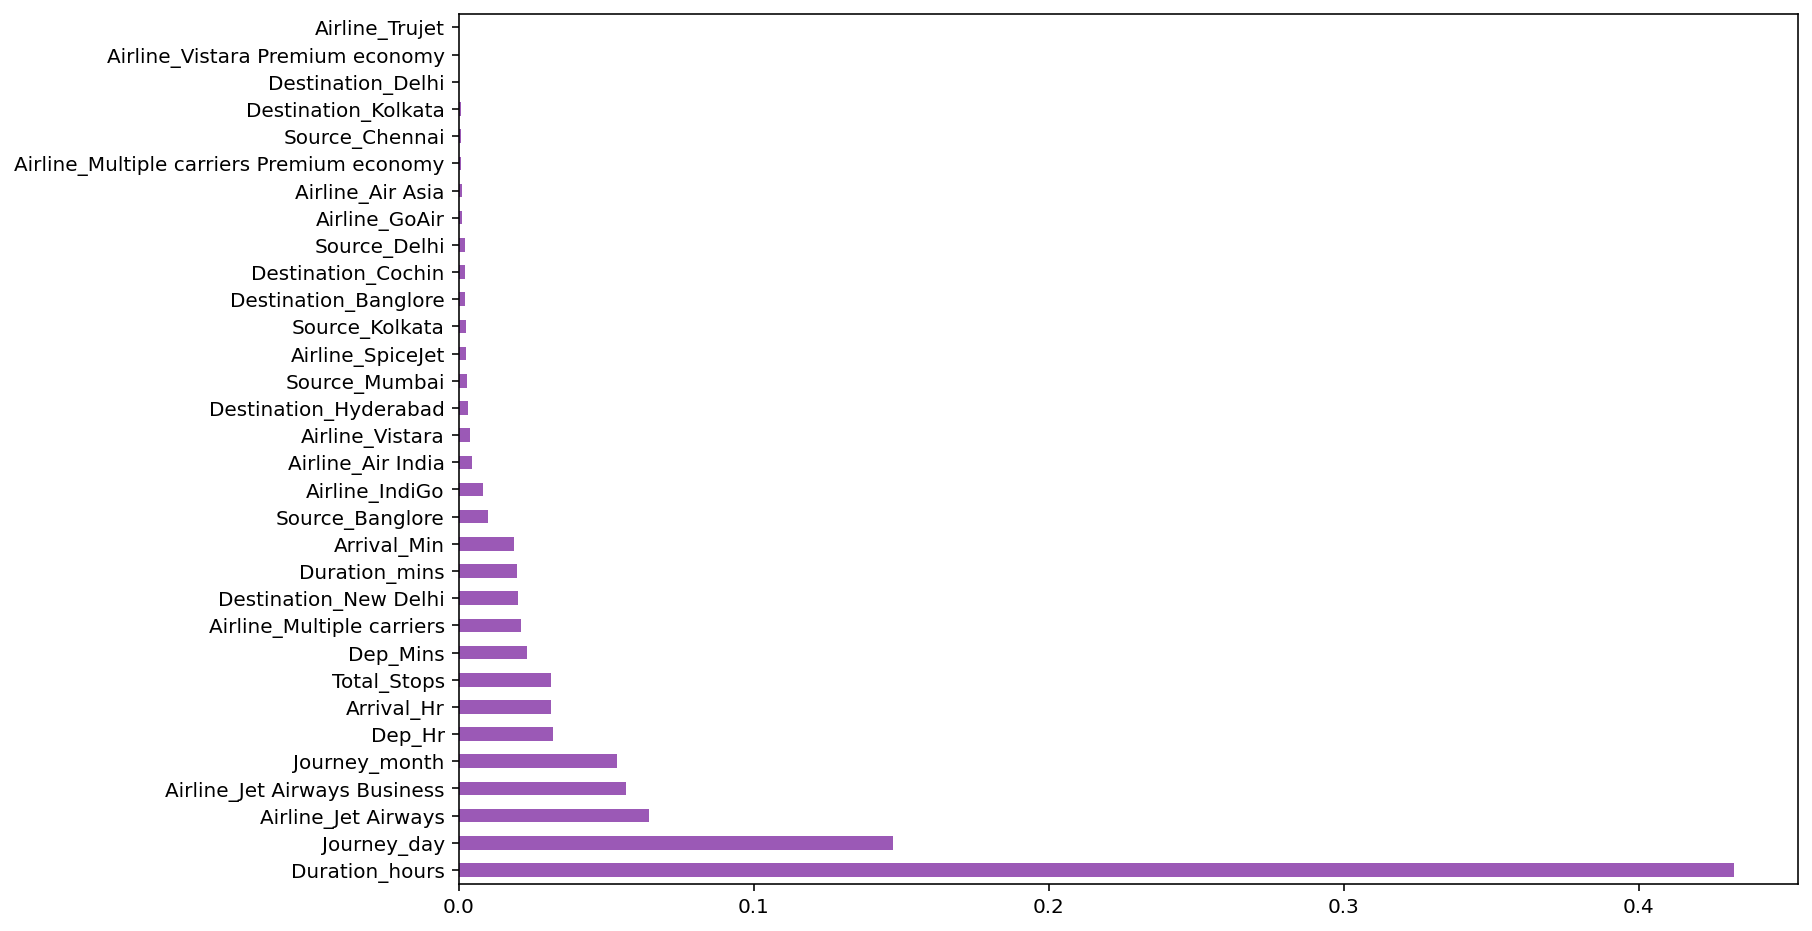

In [76]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(rf_random.estimator.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()